In [1]:
from IPython.display import clear_output
from time import sleep
import numpy as np
import math
from scipy import ndimage
from scipy import misc
import matplotlib.pyplot as plt
import random
mapache = misc.face()
div_vertical = 4
div_horizontal = 4
objetivo = None
for vertical in np.vsplit(mapache, div_vertical):
    if objetivo is None:
        objetivo = np.array(np.hsplit(vertical, div_horizontal))
        print(objetivo.shape)
    else:
        objetivo = np.vstack([objetivo, np.hsplit(vertical, div_horizontal)])
        print(objetivo.shape)
    

objetivo = objetivo.reshape([div_vertical,div_horizontal, objetivo.shape[1], objetivo.shape[2], 3])
vertical1, vertical2, vertical3, vertical4 = np.vsplit(mapache,div_vertical)
objetivo2 = np.array([np.hsplit(vertical1,div_horizontal), np.hsplit(vertical2,div_horizontal),np.hsplit(vertical3,div_horizontal),np.hsplit(vertical4,div_horizontal)])

if np.array_equal(objetivo,objetivo2):
    print("Son iguales")
else:
    print("No son iguales")
    print(objetivo.shape)
    print(objetivo2.shape)

(4, 192, 256, 3)
(8, 192, 256, 3)
(12, 192, 256, 3)
(16, 192, 256, 3)
Son iguales


In [2]:
from IPython.display import clear_output
from time import sleep
import numpy as np
import math
from scipy import ndimage
from scipy import misc
import matplotlib.pyplot as plt
import random
class Rompecabezas:
    __imagen = misc.face()
    objetivo = None
    piezas = None
    imagen_actual = None
    division_horizontal = 4
    division_vertical = 4
    auxiliar = None
    mensaje_error = ""
    def __init__(self, division_vertical, division_horizontal):
        self.division_vertical = division_vertical
        self.division_horizontal = division_horizontal
        self.__imagen = misc.face()
        #vertical1, vertical2, vertical3, vertical4 = np.vsplit(self.__imagen,self.division_vertical)
        #self.objetivo = np.array([np.hsplit(vertical1,self.division_horizontal), np.hsplit(vertical2,self.division_horizontal),np.hsplit(vertical3,self.division_horizontal),np.hsplit(vertical4,self.division_horizontal)])
        self.crear_piezas()
        
        self.piezas = self.objetivo.copy()
        self.imagen_actual = np.zeros_like(self.objetivo) 
        self.crear_rompecabezas()
        self.jugar()
    
    def crear_piezas(self):
        objetivo = None
        for vertical in np.vsplit(self.__imagen, self.division_vertical):
            if objetivo is None:
                objetivo = np.array(np.hsplit(vertical, self.division_horizontal))
            else:
                objetivo = np.vstack([objetivo, np.hsplit(vertical, self.division_horizontal)])
        objetivo = objetivo.reshape([self.division_vertical,self.division_horizontal, objetivo.shape[1], objetivo.shape[2], 3])
        self.objetivo = objetivo.copy()

    def crear_rompecabezas(self):
        cantidad_piezas = self.division_horizontal * self.division_vertical
        posiciones_iniciales = random.sample(range(cantidad_piezas), cantidad_piezas)
        
        contador = 0
        for posicion in posiciones_iniciales:
            
            self.imagen_actual[int(contador/self.division_horizontal), contador%self.division_horizontal] = self.piezas[int(posicion/self.division_horizontal), posicion%self.division_horizontal,:,:,:]
            contador = contador + 1
        
    def dibujar(self):
        nuevo = None
        for filas in range(self.division_horizontal):
            if nuevo is None:
                nuevo = np.array(np.hstack(self.imagen_actual[filas,:,:,:,:])) 
            else:
                nuevo = np.vstack([nuevo ,np.hstack(self.imagen_actual[filas,:,:,:,:])])
        fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(10,10))
        axes[0].imshow(nuevo)
        axes[1].imshow(self.__imagen)
        fig.tight_layout()
        
    def jugar(self):
        while True:
            clear_output()
            if self.mensaje_error == "":
                pass
            else:
                print(self.mensaje_error)
            self.mensaje_error = ""
            self.dibujar()
            plt.pause(1)
            #sleep(2)
            try:
                origen = int(input("Ingrese el índice origen del intercambio: "))
                destino = int(input("Ingrese el índice destino del intercambio: "))        
            except Exception:
                self.mensaje_error = "Ingrese un número correcto"
                continue
            
            if origen<0 or origen>15 or destino>15 or destino<0:
                    self.mensaje_error = "Un valor ingresado excede la cantidad de piezas del rompecabezas"
            else:
                    self.intercambio(origen,destino)
            if np.array_equal(self.imagen_actual, self.objetivo):
                break
                
        print("Felicitaciones, has completado el rompecabezas")
        self.dibujar()
    
    def dibujar_objetivo(self):
        for filas in range(self.division_vertical):
            nuevo = np.vstack([np.hstack(self.objetivo[filas,:,:,:,:])])
        
        plt.imshow(nuevo)
    def prueba_piezas(self):
        for i in range(self.division_vertical):
            for j in range(self.division_horizontal):
                plt.imshow(self.imagen_actual[i,j,:,:,:])
                
    def intercambio(self, origen, destino):
            auxiliar = np.copy(self.imagen_actual[int(origen/self.division_horizontal), origen%self.division_horizontal])
            self.imagen_actual[int(origen/self.division_horizontal), origen%self.division_horizontal] = self.imagen_actual[int(destino/self.division_horizontal), destino%self.division_horizontal]
            self.imagen_actual[int(destino/self.division_horizontal), destino%self.division_horizontal] = np.copy(auxiliar)

                  
                  
class Juego:                 
    def __init__(self):
        imagen = misc.face()
        while True:
            try:
                horizontal = int(input("Ingrese la division en la horizontal: "))
                vertical = int(input("Ingrese la division en la vertical: "))
                np.vsplit(imagen, vertical)
                np.hsplit(imagen, horizontal)
            except Exception as e:
                print("No se puede realizar el rompecabezas con esas divisiones")
                print(e)
            if vertical == 1 and horizontal == 1:
                print("No se puede realizar el rompecabezas con esas divisiones")
            else:
                rompecabezas = Rompecabezas(vertical, horizontal)
                break
            

# Bienvenido al juego de Rompecabezas
## El objetivo es armar el rompecabezas intercambiado las piezas mal ubicadas
### El juego inicia pidiéndole las divisiones horizontales y verticales para hacer el rompecabezas
### Al empezar con el rompecabezas se le pedirá indicar dos piezas para ser intercambiadas. 
#### La numeración de las piezas empieza desde arriba a la izquierda, aumentando uno hacia la derecha y empezando desde cero
### Por ejemplo, así
|  0 |  1 | 2  | 3  |
|----|----|----|----|
|  4 |  5 | 6  | 7  |
|  8 |  9 | 10 | 11 |
| 12 | 13 | 14 | 15 |

### Para empezar a jugar ejecute la celda superior

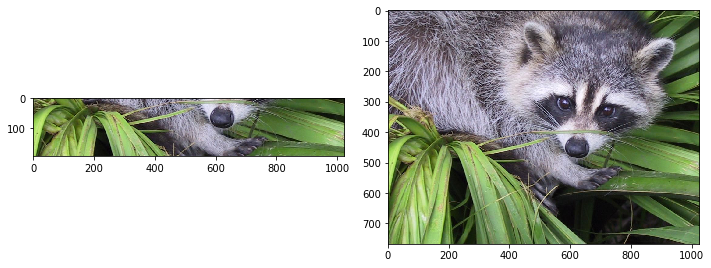

In [ ]:
#rompecabezas = Rompecabezas()
juego = Juego()